## Movies

Data is imported from [letterboxd.com](https://letterboxd.com/)

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("../mwild.db")

diary = pd.read_sql_query(
    """select date, name, year, rating, rewatch
    from movies_diary
    order by date desc""",
    conn,
    index_col="date",
    parse_dates={"date": "s"})

ratings = pd.read_sql_query("select name, year, rating from movies_ratings order by rating desc", conn)

conn.close()

diary, ratings

(                                                 name  year rating  rewatch
 date                                                                       
 2019-12-15                                  Lady Bird  2017      4        0
 2019-12-07                             Marriage Story  2019    4.5        0
 2019-12-04                                Jojo Rabbit  2019    4.5        0
 2019-12-01                               The Irishman  2019      3        0
 2019-11-06             Once Upon a Time… in Hollywood  2019      4        0
 ...                                               ...   ...    ...      ...
 2018-05-30  The Hobbit: The Battle of the Five Armies  2014      4        0
 2018-05-29        The Hobbit: The Desolation of Smaug  2013      4        0
 2018-05-28          The Hobbit: An Unexpected Journey  2012      4        0
 2018-05-24                    Solo: A Star Wars Story  2018      4        0
 2018-05-09                           Ready Player One  2018      4        0

### Github-style heatmap

<module 'matplotlib.pyplot' from 'c:\\users\\wilds\\scoop\\apps\\python\\current\\lib\\site-packages\\matplotlib\\pyplot.py'>

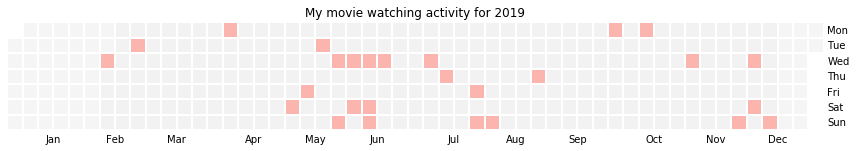

In [7]:
import calmap
import datetime

year = "2019"

plt.figure(figsize=(12, 3))

calmap.yearplot(diary[year]["name"], how="count", cmap="Pastel1_r")
plt.tight_layout()
plt.title("My movie watching activity for {}".format(year))
plt


### Most popular day of the week

I expect this to be Wednesday, thanks to all the $5 Wednesday's at Academy Cinemas!

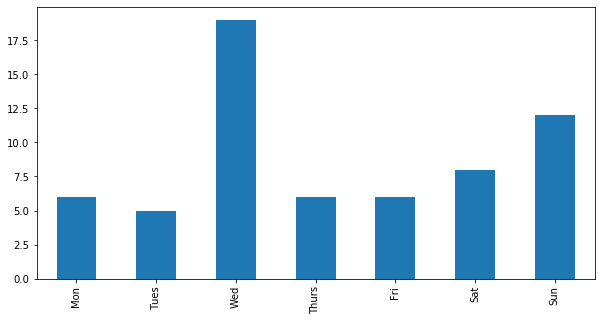

In [3]:
by_weekday = diary.groupby(diary.index.dayofweek)["name"].count()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

by_weekday.plot.bar(figsize=(10, 5))

### HIghest Rated Movies of the Year

In [4]:
highest_rated = diary["2019"].sort_values(by="rating", ascending=False).head(10)
highest_rated

,name,year,rating,rewatch
date,,,,
2019-05-17,Avengers: Endgame,2019,5,0
2019-12-04,Jojo Rabbit,2019,4.5,0
2019-12-07,Marriage Story,2019,4.5,0
2019-12-15,Lady Bird,2017,4,0
2019-07-10,The Man Who Killed Don Quixote,2018,4,0
2019-02-26,Alita: Battle Angel,2019,4,0
2019-06-12,The Last Suit,2017,4,0
2019-06-19,John Wick: Chapter 3 - Parabellum,2019,4,0
2019-11-06,Once Upon a Time… in Hollywood,2019,4,0


### Ratings given

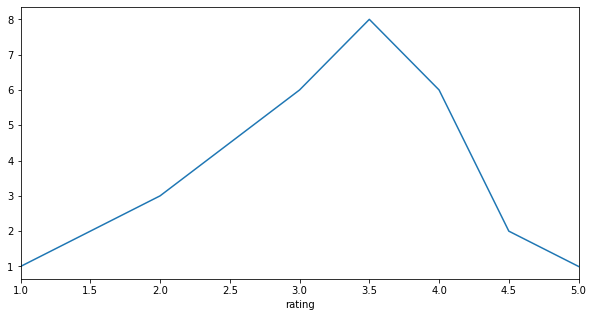

In [5]:
ratings = diary["2019"].groupby("rating")["name"].count()
ratings.plot(figsize=(10, 5))

### Ratings by date

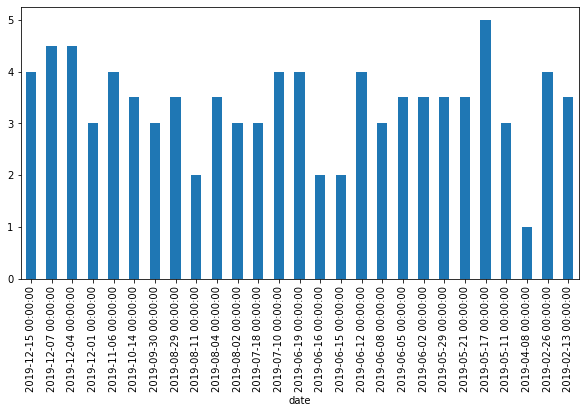

In [6]:
diary["2019"]["rating"].plot.bar(figsize=(10, 5))


### Ratings by Movie year

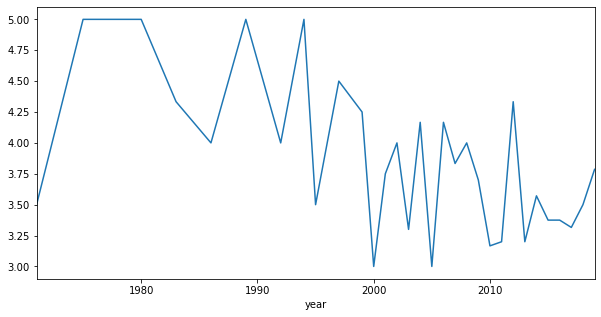

In [17]:
x = ratings.groupby("year")["rating"].mean()
x.plot(figsize=(10, 5))